# Zalożenia projektu:
## Problem biznesowy:
Wiele osób stara się o adpocję psa. Wielkość psa powinna być dostosowana do cech demograficznych posiadacza (tak aby przyszły posiadacz psa mógł sobie w przyszłości poradzić z pupilem bez szkody na zdrowiu dla właściciela czy dla psa. Pies powinien też dobrze się czuć w otoczeniu w którym bedzie przebywał, dlatego też miejsce jego przyszłego zamieszkania powinno też mieć znaczenie - na przykład liczba innych psów  w okolicy).

W poniższym projekcie zostanie sprawdzone czy cechy demograficzne oraz miejsce zamieszkania właściciela odpowiedają wielkości psa i czy po kątem tych atrybutów w przyszłości można doradzać przyszłym posiadaczon psów jakim wielkości psem powinni się zaopiekować.


## Problemem badawczy:
Dostosowanie wielkości psa do cech demograficznych jego posiadacza

## Hipoteza
Wielkość psa (mały, duży, średni) odpowiada cechom demograficznym posiadacza (takim jak płeć, wiek i miejsce zamieszkania)

źródło danych:

https://www.kaggle.com/kmader/dogs-of-zurich 

Zbiór danych zawiera informacje z lat 2015-2017 na temat psów które żyły w Zurychu (dane dotyczące psów oraz ich właścicieli)

# Objaśnienie nazw kolumn 
oryginalny data set jest w języku niemieckim (dane dotyczą psów w Zurichu)

```
- ALTER -> wiek posiadacza psa
- GESCHLECHT -> płeć posiadacza psa
- STADTKREIS -> Dystrykt w którym posiadacz psa mieszka. 
W Zurichu istnieje 12 dystryktów. Źródło: https://www.stadt-zuerich.ch/prd/de/index/statistik/kreise-quartiere.html
- RASSE1 -> Rasa psa (główna)
- RASSE2 -> Rasa psa (jeżeli to mieszaniec)
- RASSENTYP -> typ rasy pasa. Zmienna kategoryczna. 
Trzy typy: K, I, II. K Opisane w pliku dotyczącym mapowania. K oznacza psy małe, I - psy średnie, II - psy duże i bardzo duże
- GEBURTSJAHR_HUND -> Rok urodzenia psa
- GESCHLECHT_HUND -> Płeć psa
- HUNDEFARBE -> umaszczenie psa
- year -> utworzona przeze mnie kolumna z oznaczeniem w którym roku były zbierane dane
```


In [ ]:
# importuję paczki
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ustawiam ścieżkę do folderu na którym będę pracował (ustawiam working directory)
# notatnik jest połączony z Google Drive - dane zostały pobrane wcześniej z Kaggle
# i wrzucone na Google Drive
path = '/content//drive/MyDrive/Colab Notebooks/PJP_2021/'
os.chdir(path)
print(f'Current WD is: {os.getcwd()}')

Current WD is: /content/drive/MyDrive/Colab Notebooks/PJP_2021


# 1. Wczytanie danych

In [ ]:
# importuję dane - 3 pliki csv w jednej pętli
# wskazuję miejsce przetrzymywania danych
data_set_path = "./data/"
# regexem ładuję ścieżki tylko do plików csv
file_names = glob.glob(f'{data_set_path}*hundehalter.csv')
print(file_names)
# tworzę listę lat - każdy data set to oddzileny rok, w momęcie wczytywania danych
# będzie tworzona nowa kolumna z rocznikiem danych
years = [2015, 2016, 2017]
dog_data = []

# iteruję się po każdej ścieżce i wczytuję każdy plik - następnie przypisuję 
# do wcześniej pustej listy za pomocą funkcji append
for n, (one_file, year) in enumerate(zip(file_names, years)):
  tmp_data = pd.read_csv(one_file)
  tmp_data['year'] = year
  # sprawdzam liczbę wierszy i liczbę kolumn w każdym załadowanym data secie
  print(f'shape of {n} data is: {tmp_data.shape}')
  dog_data.append(tmp_data)

# łączę 3-elementową listę (jeden data set to jeden element listy) w jeden DF
dog_data = pd.concat(dog_data, ignore_index=True)
print(f'shape dog data DF is: {dog_data.shape}')

['./data/20160307hundehalter.csv', './data/20170308hundehalter.csv', './data/20151001hundehalter.csv']
shape of 0 data is: (6930, 14)
shape of 1 data is: (7155, 14)
shape of 2 data is: (6980, 14)
shape dog data DF is: (21065, 14)


# 2. Przygotowanie i czyszczenie danych

## 2.1 Opis danych

In [ ]:
display(dog_data.head(5))

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE,year
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun,2015
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor,2015
2,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle,2015
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun,2015
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz,2015


In [ ]:
print(dog_data.shape)
print(dog_data.info())
print(dog_data.count())

(21065, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21065 entries, 0 to 21064
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HALTER_ID         21065 non-null  int64  
 1   ALTER             21060 non-null  object 
 2   GESCHLECHT        21065 non-null  object 
 3   STADTKREIS        21060 non-null  float64
 4   STADTQUARTIER     21060 non-null  float64
 5   RASSE1            21065 non-null  object 
 6   RASSE1_MISCHLING  1939 non-null   object 
 7   RASSE2            1590 non-null   object 
 8   RASSE2_MISCHLING  0 non-null      float64
 9   RASSENTYP         20891 non-null  object 
 10  GEBURTSJAHR_HUND  21065 non-null  int64  
 11  GESCHLECHT_HUND   21065 non-null  object 
 12  HUNDEFARBE        21065 non-null  object 
 13  year              21065 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 2.3+ MB
None
HALTER_ID           21065
ALTER               21060
GESCHLEC

### Wnioski:
-----
- W zbiorze danych znajduje się **21 605** obserwacji z lat 2015-2017. 
Kolumny takie jak RASSE_1MISCHLING oraz RASSE2_MISCHLING należy usuąć z zbioru danych - nie nadają się do dalszej analizy. Research wskazał, że kolumny te oznaczają czy pies jest mieszańcem (kundlem) czy nie. Jednakże wielkość psa jest oznaczana po jego głównej rasie. Także te kolmny są do usunięcia i są nieprzydatne do dalszej analizy. 
- W kolumnie dotyczącej drugiej rasy (RASSE2) istnieją bardzo duże braki w danych. Być może dane dotyczą tylko psów rasowych i nie ma w danych informacji dotyczących mieszańców. Research wskazał, że wielkość psa jest oznaczana na podstawie jego głównej rasy więc kolumna także jest do usunięcia
- istnieją braki w danych w mapowaniu ras psów do jednej z trzech kategorii (K, I lub II) (brak danych dla 174 obserwacji).

#### weryfikacja braków w danych i porządkowanie data setu

In [ ]:
# sprawdzam braki w danych w kolumnie Rassentyp
print("ile jest obserwacji przyporządkowanych do danej kategorii")
print(dog_data.groupby(['RASSENTYP']).size())
print()
print("liczba wierszy z brakami w danych - brak przyporządkowanych psów do kategorii")
print(sum(dog_data['RASSENTYP'].isnull()))
print()
print("Jakiego rodzaju rasy psów nie zostały przyporządkowane")
print(dog_data[dog_data['RASSENTYP'].isnull()].groupby(['RASSE1']).size())

ile jest obserwacji przyporządkowanych do danej kategorii
RASSENTYP
I      7768
II       63
K     13060
dtype: int64

liczba wierszy z brakami w danych - brak przyporządkowanych psów do kategorii
174

Jakiego rodzaju rasy psów nie zostały przyporządkowane
RASSE1
Biewer Yorkshire Terrier         6
Daisy-Dog                        1
Deutscher Jagdterrier            2
Dogo Canario                     3
Elo                              2
Miniature Australien Shepard     7
Pudel                           92
Schwedischer Vallhund            1
Spaniel                          6
Terrier                         54
dtype: int64


Jako, że braki w danych oznaczających wielkość psa sąstosunowo niskie (dotyczy 174 obserwacji), a brak znajomości tematu wyklucza ręczne dopasowanie danej rasy psa do grupy psów (małych, średnich bądź dużych), a szybki research w google podpowiada, że to są psy z pogranicza średnie vs małe to te braki w danych zostaną usunięte z dalszej analizy

In [ ]:
# usuwam kolumny: ASSE_1MISCHLING oraz RASSE2_MISCHLING
# używam argumentu inplace aby automatycznie już nadpisać cały DF
dog_data.drop(['RASSE1_MISCHLING', 'RASSE2', 'RASSE2_MISCHLING'], axis=1, inplace=True)
# usunięcie danych w których były braki w danych dotyczące przyporządkowania rasy psa do jego wielkości
dog_data = dog_data[~dog_data['RASSENTYP'].isnull()]

W dalszej części badania nie będą potrzebne takie kolumny jak:
- halter_id - niepotrzebne oznaczenie, unikalne ID właściciela psa
- STADTQUARTIER - dokładne zamieszkanie. Wystarczy Dystryk 
- RSSE1 - po zmapowaniu do małego/średniego/dużego psa - dalsze utrzymywanie tej kolumny jest niepotrzebne, już więcej informacji nie da się z tej kolumny uzyskać
- Hundefabre - umaszczenie psa. Nie będzie badane.
- do wyliczenia wieku psa zostanie wyliczona kolumna year (rok zebrania danych) oraz rok urodzenia psa (GEBURTSJAHR_HUND). Później te kolumny już nie będą potrzebne, więc zostaną także usunięte.

---
UPDATE
kolumny takie jak rok urodzenia psa nie będzie wykorzystywana. Do usunięcia

In [ ]:
dog_data['dog_age'] = dog_data['year'] - dog_data['GEBURTSJAHR_HUND']
columns_to_remove = ['HALTER_ID', 'RASSE1', 'STADTQUARTIER', 'HUNDEFARBE',
                     'GEBURTSJAHR_HUND', 'year', 'dog_age']
dog_data.drop(columns_to_remove, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# podmieniam nazwy kolumn dla dalszej ich łatwiejszej obróbki,
# zmieniam też oznaczenia 'm' (mężczyzna) i 'w' (Kobieta) na płeć M i F (Male i Female)
# zarówno dla właścicieli jak i dla oznaczenia płci psa
# a także oznaczenia dla wielkości psa: K -> S (Small), I -> M (Medium), II -> L (Large)
dog_data.rename({
    'ALTER': 'owner_age', 
    'GESCHLECHT': 'owner_gender',
    'STADTKREIS': 'owner_district',
    'RASSENTYP': 'dog_size',
    'GESCHLECHT_HUND': 'dog_gender'}, 
    axis=1,
    inplace=True)
dog_data['owner_gender'] = dog_data['owner_gender'].apply(lambda x: 'M' if x == 'm' else 'F')
dog_data['dog_gender'] = dog_data['dog_gender'].apply(lambda x: 'M' if x == 'm' else 'F')
dog_size_dict = {
    'K': 'S',
    'I': 'M',
    'II': "L"}
dog_data['dog_size'] = dog_data['dog_size'].map(dog_size_dict)

In [ ]:
# tak przygotowane dane mogą zostać już poddane analizie
display(dog_data.head())

,owner_age,owner_gender,owner_district,dog_size,dog_gender
0,51-60,M,9.0,S,F
1,61-70,M,3.0,M,M
2,61-70,F,2.0,S,F
3,41-50,M,6.0,M,F
4,61-70,F,7.0,M,F


In [ ]:
# suma wszystkich psów do wyliczenia procentowego udziały w każdej z badanych grup
sum_of_all_dogs = dog_data.shape[0]
# procentowy udział wg grupy wiekowej
owner_dog_age = (
    dog_data
    .groupby(['owner_age'])
    .size()
    .to_frame('size')
    .reset_index()
)
owner_dog_age['percentage_age_share'] =  owner_dog_age['size'] / sum_of_all_dogs

# procentowy udział wg płci posiadacza
owner_dog_gender = (
    dog_data
    .groupby(['owner_gender'])
    .size()
    .to_frame('size')
    .reset_index()
)
owner_dog_gender['percentage_gender_share'] =  owner_dog_gender['size'] / sum_of_all_dogs

# procentowy udział wg dystryktow
owner_dog_district = (
    dog_data
    .groupby(['owner_district'])
    .size()
    .to_frame('size')
    .reset_index()
)
owner_dog_district['owner_district'] = owner_dog_district['owner_district'].astype(str)#.str.replace(".0", "")
owner_dog_district['percentage_district_share'] =  owner_dog_district['size'] / sum_of_all_dogs

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


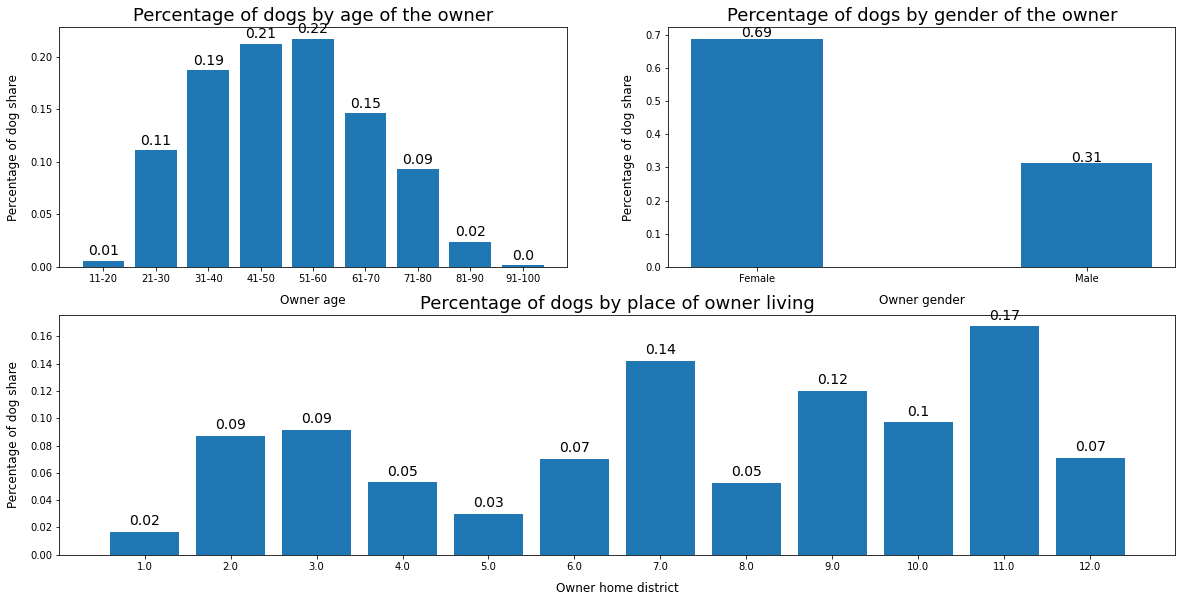

In [ ]:
# owner_dog_age
fig = plt.figure(figsize = (20, 15))
fig.tight_layout(pad=3.0)

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 1, 2)

ax1.bar(owner_dog_age['owner_age'], owner_dog_age['percentage_age_share'])
ax2.bar(owner_dog_gender['owner_gender'], owner_dog_gender['percentage_gender_share'], width = 0.4)
ax3.bar(owner_dog_district['owner_district'], owner_dog_district['percentage_district_share'])

# titles of plots
ax1.set_title(
    label = "Percentage of dogs by age of the owner",
    size = 18
)

ax2.set_title(
    label = "Percentage of dogs by gender of the owner",
    size = 18
)

ax3.set_title(
    label = "Percentage of dogs by place of owner living",
    size = 18
)

# x axis titles
ax1.set_xlabel(
    xlabel = "Owner age",
    labelpad = 10,
    fontfamily = "Roboto",
    fontsize = 12
)
ax2.set_xlabel(
    xlabel = "Owner gender",
    labelpad = 10,
    fontfamily = "Roboto",
    fontsize = 12
)
ax3.set_xlabel(
    xlabel = "Owner home district",
    labelpad = 10,
    fontfamily = "Roboto",
    fontsize = 12
)

# y axis title
ax1.set_ylabel(
    ylabel = "Percentage of dog share",
    labelpad = 10,
    fontfamily = "Roboto",
    fontsize = 12
)
ax2.set_ylabel(
    ylabel = "Percentage of dog share",
    labelpad = 10,
    fontfamily = "Roboto",
    fontsize = 12
)
ax3.set_ylabel(
    ylabel = "Percentage of dog share",
    labelpad = 10,
    fontfamily = "Roboto",
    fontsize = 12
)

# x text axis view
ax1.set_xticklabels(owner_dog_age['owner_age'], fontsize=10)
ax2.set_xticklabels(["Female", "Male"], fontsize=10)
ax3.set_xticklabels(owner_dog_district['owner_district'], fontsize=10)

# labels on the bars
for x, y in zip(owner_dog_age['owner_age'], owner_dog_age['percentage_age_share']):
  ax1.text(
      x = x,
      y = y + 0.005,
      s = round(y, 2),
      size = 14,
      ha = 'center',

  )

for x, y in zip(owner_dog_gender['owner_gender'], owner_dog_gender['percentage_gender_share']):
  ax2.text(
      x = x,
      y = y + 0.005,
      s = round(y, 2),
      size = 14,
      ha = 'center',

  )

for x, y in zip(owner_dog_district['owner_district'], owner_dog_district['percentage_district_share']):
  ax3.text(
      x = x,
      y = y + 0.005,
      s = round(y, 2),
      size = 14,
      ha = 'center',

  )

# Posiadanie psa a wiek
1. W grupach wiekowych - które można by uznać za nie do końca samodzielne jeżeli chodzi o posiadanie czworonoga - występuje najmniejsze skupienie psów (grupy bardzo młode jak 11 - 20 więc osoby prawnie niesamodzielne, oraz starse - 81-90 i 91-100. W ostatniej grupie istnieje także bardzo mało danych - powiązane z naturalnym wiekiem ludzkim i tym, że stosunkowo mała liczba osób dożywa d otego wieku, a jeżeli tak to jest zbyt schorowana na opiekę nad psem. Osoby w wieku 81-90 lat także zdecydowanie rzedziej, niż osoby młodsze decydują się na posiadanie psa. Można stwierdzić iż wraz z osiągnięciem samodzielności żywciowej mieszkańcy Zurychu decydują się na posiadanie psa, jednak im są coraz starsi - tym rzedziej decydują się na posiadanie psa.
2. Najwięcej posiadaczy psów jest w grupie wiekowej 51-60, a także 41-50 (o 1% mniej). Licznagrupę stanowią też osoby miedzy 31-a 40. Łącznie te 3 grupy wiekowe posiadają 62% wszsystkich psów w Zurichu. Jest to grupa wiekowa posiadająca zapewne już stabilność finansową, są również na tyle młode że są w stanie zaopiekować się psem. Dlatego w tych grupach można zaobserwować częściej niż w pozostałych posiadanie psa.

# Płeć posiadacza psa
To zdecydowanie częściej kobiety, niż mężczyźni decydują się na posiadanie psa. Większe jest prawdopodobieństwo tego, że to kobieta będzie posiadała psa, niż mężczyzna. 

# Miejsce zamieszkania w Zurichu vs posiadanie psa
1. Najwięcej posiadaczy psów mieszka w dystrykcie 11, drugie pod kątem popularności jest dystryk 14 oraz 9. Najmniej posiadaczy psów mieszka w dystrykcie 1 oraz 5, niewiele więcej w dystryktach 4, 8 i 7. Można założyć, iż miejsce zamieszkiwania właściciela może wpływać na podjęcie decyzji o posiadaniu psa.

In [ ]:
# suma wszystkich psów do wyliczenia procentowego udziału w poszczególnych grupach
sum_of_all_dogs = dog_data.shape[0]
# procentowy udział wg wielkości psa
dog_size = (
    dog_data
    .groupby(['dog_size'])
    .size()
    .to_frame('size')
    .reset_index()
)

dog_size['dog_size'] = pd.Categorical(dog_size['dog_size'], categories = ['S', "M", "L"] , ordered = True)
dog_size = dog_size.sort_values(['dog_size'])

dog_size['percentage_dogSize_share'] =  dog_size['size'] / sum_of_all_dogs

# procentowy udział wg płci psa
dog_gender = (
    dog_data
    .groupby(['dog_gender'])
    .size()
    .to_frame('size')
    .reset_index()
)
dog_gender['percentage_gender_share'] =  dog_gender['size'] / sum_of_all_dogs


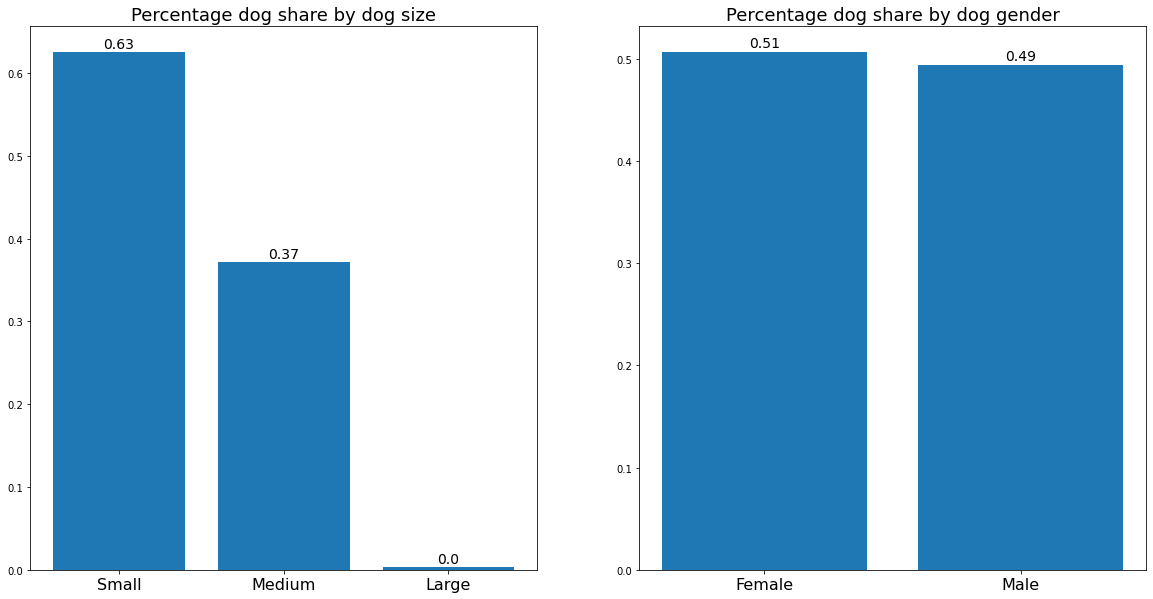

In [ ]:
# wykersy płec psa i wielkość psa

fig, (ax1, ax2) = plt.subplots(1, 2,  figsize = (20, 10))

ax1.bar(dog_size['dog_size'], dog_size['percentage_dogSize_share'])
ax2.bar(dog_gender['dog_gender'], dog_gender['percentage_gender_share'])

# set titles of plots
ax1.set_title("Percentage dog share by dog size", size = 18)
ax2.set_title("Percentage dog share by dog gender", size = 18)

ax1.set_xticklabels(
    labels = ["Small", "Medium", "Large"],
    Fontsize = 16
)

ax2.set_xticklabels(
    labels = ["Female", "Male"],
    Fontsize = 16
)

for x, y in zip(dog_size['dog_size'], dog_size['percentage_dogSize_share']):
  ax1.text(
      x = x,
      y = y + 0.005,
      s = round(y, 2),
      size = 14,
      ha = "center"
  )

for x, y in zip(dog_gender['dog_gender'], dog_gender['percentage_gender_share']):
  ax2.text(
      x = x,
      y = y + 0.005,
      s = round(y, 2),
      size = 14,
      ha = "center"
  )

# Wielkość psa
1. Wg danych w zurichu prawie nie występują lub w ogóle nie występują psy skategoryzowane jako duże. Dlatego też ta kategoria psów zostanie usunięta w dalszej części badania. 
2. Najczęściej ludzie decydują się na posiadanie sów małych niż średnich. 63% wszystkich właścicieli psów ma psy skategoryzowane jako małe.

# Płeć posiadanego psa
1. W przypadku płci czworonoga trudno jest mówić o schematach - rozkład rozkłada się rówomiernie na suki (51% wszystkich psów) i 49% psów.

In [ ]:
# sprawdzam prawdopodobieństwo wysepowania psa małego lub dużego w poszczególnych grupach. 
#Odrzucam kolumnę z psami dużymi bowiem te prawie nie występują w zbiorze danych
# będę pracował tylko na kolumnie dog_size_s - bowiem jest przerobiona na wartości 0-1 (0 - nie mały pies, 1 - maly pies)
dog_data_size = (
   pd.get_dummies(
    dog_data,
    columns=['dog_size'],
    drop_first=False
  ) 
).drop(['dog_size_L', 'dog_size_M'], axis = 1)

columns_to_check = ['owner_age', 'owner_gender', 'owner_district']
for col in columns_to_check:
  print(
      dog_data_size['dog_size_S'].groupby(dog_data_size[col]).mean()
  )

owner_age
11-20     0.761905
21-30     0.683305
31-40     0.599847
41-50     0.623620
51-60     0.587872
61-70     0.642484
71-80     0.632800
81-90     0.724752
91-100    0.681818
Name: dog_size_S, dtype: float64
owner_gender
F    0.658572
M    0.551465
Name: dog_size_S, dtype: float64
owner_district
1.0     0.612360
2.0     0.563496
3.0     0.627349
4.0     0.736224
5.0     0.594295
6.0     0.588995
7.0     0.547627
8.0     0.598368
9.0     0.674771
10.0    0.598320
11.0    0.666476
12.0    0.697643
Name: dog_size_S, dtype: float64


W analizie pod względem posiadania psa usunięto kategorię psów dużych gdyż w danych jest znikoma liczba obserwacji na ten temat. 

1. Jeżeli chodzi o grupy wiekowe to na posiadanie psa małego najczęściej decydują się osoby młode (można powiedzieć dzieci/nastolatki - albo też że takim osobom rodzice kupują małe psy) oraz osoby starsze. Im starsza osoba tym prawdopodobieństwo tego, że pies będzie mały wzrasta. Ogólnie najczęściej posiadanym psem w Zurichu jest pies małey, jednak to osooby z przedziału wiekowego 51-60 oraz 31-40 częściej niż osoby z posotałych grup wiekowych mają psy większe (średnie). 

Większe jest prawdopodobieństwo posiadania małego psa przez osoby z grupy wiekowej młodych (11-20) oraz starszych (60+) niż w grupach 31-40 oraz 51-0. warto zwrócić również uwagę na to, że w grupie wiekowej 21-30 również istnieje większe prawdopodobieństwo posiadania mniejszego psa niż większego (na poziomie zblizonym do grup 70+

# wiek posiadacza vs wielkość psa
1. Większe istnieje prawdopodobieństo tego, że to kobieta posiada małego psa niż mężczyzna.

# Miejsce zamieszkania właściciela vs wielkość psa
Największe prawdopodobieństwo spotkania większego (średniego psa) istnieje w dystrykce 7. JEst to też drugi pod względem popularności region mieszkania właścicieli psów.



In [ ]:
# sprawdzam prawdopodobieństwo wysepowania psa ze względu na płeć 
# będę pracował tylko na kolumnie dog_gender_M - bowiem jest przerobiona na wartości 0-1 (0 - pies, 1 - suka)
dog_data_gender = (
   pd.get_dummies(
    dog_data,
    columns=['dog_gender'],
    drop_first=False
  ) 
).drop(['dog_gender_M'], axis = 1)

columns_to_check = ['owner_age', 'owner_gender', 'owner_district']
for col in columns_to_check:
  print(
      dog_data_gender['dog_gender_F'].groupby(dog_data_gender[col]).mean()
  )

owner_age
11-20     0.515873
21-30     0.456540
31-40     0.497957
41-50     0.477800
51-60     0.536714
61-70     0.518627
71-80     0.547189
81-90     0.538614
91-100    0.659091
Name: dog_gender_F, dtype: float64
owner_gender
F    0.525536
M    0.464642
Name: dog_gender_F, dtype: float64
owner_district
1.0     0.421348
2.0     0.542056
3.0     0.521399
4.0     0.456188
5.0     0.405705
6.0     0.519022
7.0     0.548300
8.0     0.495920
9.0     0.474691
10.0    0.503953
11.0    0.519038
12.0    0.484175
Name: dog_gender_F, dtype: float64


Płeć psa trudno jest określić ze względu na wiek/płeć właściciela/miejsce zamieszkania właściciela. W wszystkich badanych kategoriach i grupach - prawdopodobieństwo występowania suki bądź psa oscyluje w okolicy 50%

Dlatego też kategoria powiązana z płacią psa zostanie usunieta z dalszego badania

In [ ]:
# usuwam kolumnę dotyczącą płci psa - ze względu na to, że pod kątem każdej badanej cechy - płeć psa rozkłada się po mniej więcej 50% w każdej z grup
dog_data = dog_data.drop(['dog_gender'], axis = 1)

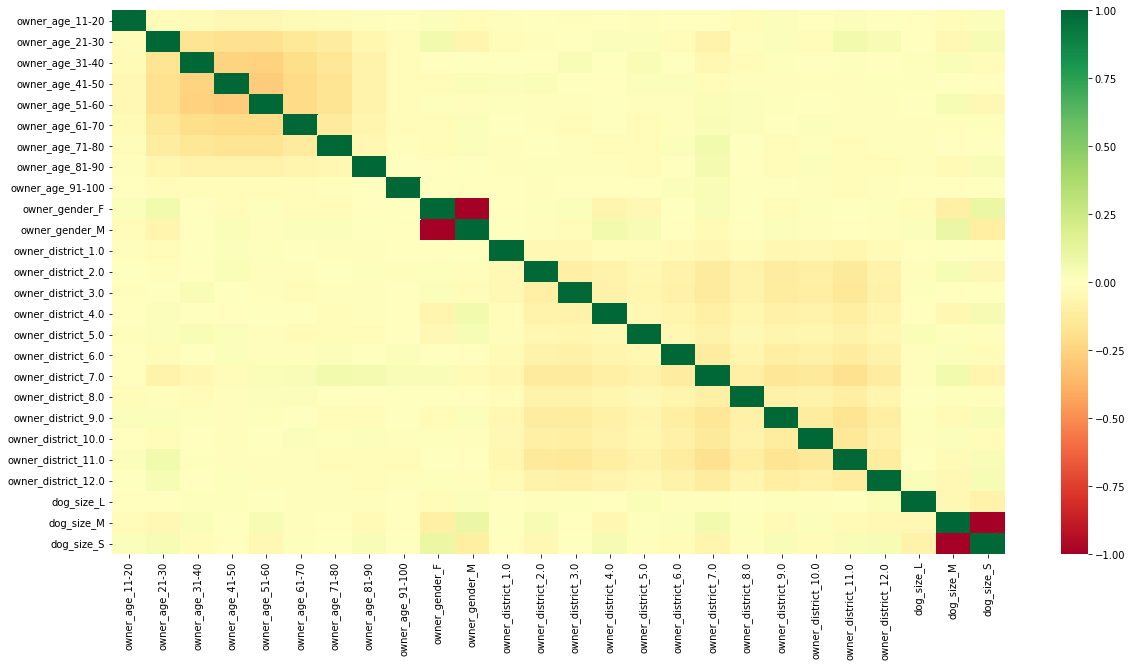

In [ ]:
dog_data_corr = pd.get_dummies(
    dog_data,
    columns=['owner_age', 'owner_gender', 'owner_district', 'dog_size'],
    drop_first=False
)

plt.figure(figsize=(20,10))
sns.heatmap(dog_data_corr.corr(), cmap='RdYlGn')

1. Występuje niewielka pozytywna korelacja pomiedzy płcią posiadacza psa a wielkością psa (istnieje większe prawdopodobieństwo tego, że kobieta będzie właścicielką/weźmie małego psa) niż mężczyzna. W przypadku meżżczyzn występuje niewielka korelacja ujemna (męźczyźni z większym prawdopodobieństwem posiadają psy średnie).

2. Ze względu na wiek posiadacza psa - występują niewielkie korelacja w grupach młodszych i starszych (w grupie 51-60 - niewileka korelacja tego, że człowiek posiada psa większego, natomiast w grupie 21-30 - mniejszego. 
Warto też zauważyć, że wśród właścicieli psów w grupie 21-30 jest niewielka przewaga kobiet (niewielka korelacja płci z tą kategorią wiekową). Płeć posiadacza silniej determinuje rozmiar posiadanego psa - dlatego też w tej grupie wiekowej może występować więcej psów małych niż średnich.

3. Jeżeli chodzi o miejsce zamieszkania posiadania psa - występuje niewielka korelacja w dystryktach 7, 4 oraz oraz 2. W dystrykcie 4 istnieje większe prawdopodobieństwo poosiadania psa małego, w dystrykcie 7 oraz 2 - średniego

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # do dzielenia zbiorów na zbiór treningowy i testowy
from sklearn import metrics

In [ ]:
# przygotowanie danych do uruchomienia modelu
dog_data_toModel = (
    pd.get_dummies(
    dog_data,
    columns=list(dog_data.columns),
    drop_first=False
    )
# usuwam kolumny z dog size L i dog size M - wcześniejszy research pokazał że 
# psy duże prawie w ogóle nie występują w zbiorze danych, a kolumna dog size S
# będzie wówczas skategoryzowana na wertości (0:1) - 0 pies średniego rozmiar, 1 - pies dużego rozmiaru
# a także owner gender M - ta zmienna którea zostaje (owner_gender_F) również jest skategoryzowana jako 0-1 (mężczyzna:kobieta)
).drop(['dog_size_L', 'dog_size_M', 'owner_gender_M'], axis = 1) 
# zmieniam nazwę kolumny na dog_size - dla łatwiejszego jej czytania
dog_data_toModel.rename(columns={"dog_size_S": "dog_size"}, errors="raise", inplace = True)

In [ ]:
X = dog_data_toModel.loc[:, dog_data_toModel.columns != "dog_size"]
y = dog_data_toModel["dog_size"]

In [ ]:
# podzielenie zbioru na zbiór treningowy oraz na zbiór testowy
# wybieramy moduł model selection i stamtąd importujemy funkcje

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
logreg = LogisticRegression(max_iter = 10000)

# uruchamiam model na danych treningowych
logreg.fit(X_train, y_train)

print(logreg.score(X_train, y_train)) # model zaklasyfikował poprawnie 63% przypadków
print("wyraz wolny")
print(logreg.intercept_)
print("wspołczynnik")
print(logreg.coef_)

# sprawdzam działanie modelu na danych testowych - przewiduję zmienną Y na podstawie podanych danych X-test (dane testowe)
y_pred = logreg.predict(X_test)

# sprawdzam wyniki na danych testowych - porównyje dane testowe z danymi sklasyfikowanymi przez model
print('procent poprawnie sklasyfikowanych danych')
print(metrics.accuracy_score(y_test, y_pred)) # accuracy nadal wynosi 63 % - model poprawnie sklasyfikował 63% danych. Nie jest to wysoki score, ale nie mamy do czynienia z przeuczeniem modelu
print('recall')
print(metrics.recall_score(y_test, y_pred)) # poprawnie sklasyfikowano 93% dodatnie sklasyfikowanych wyników (dobrze działa na klasyfikowanie psów jako małe)
print('precision score')
print(metrics.precision_score(y_test, y_pred)) # niestety jest słaba pewność klasyfikatora dla przykłądów pozytywnych - na poziomie 64% - czyli klasyfikator klasyfikuje obiekt jako mały pise - gdy pies jest średniego rozmiaru
print('F1 score')
print(metrics.f1_score(y_test, y_pred))

0.6352920057443753
wyraz wolny
[0.63133378]
wspołczynnik
[[ 0.15614386 -0.26241738 -0.53892449 -0.40837278 -0.56083013 -0.28124545
  -0.28794065  0.21583692  0.09487278  0.49652878 -0.11780694 -0.27282618
  -0.06831871  0.56788129 -0.07607014 -0.20723607 -0.43336757 -0.14728742
   0.18698098 -0.16629768  0.13611093  0.19485399]]
[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [ ]:
# srpawdzam współczynniki dla regresji dla poszczególnych zmiennych
pd.DataFrame({
    'feature': list(X.columns),
    'coef': logreg.coef_.tolist()[0]
}).sort_values(['coef'])


,feature,coef
4,owner_age_51-60,-0.560830
2,owner_age_31-40,-0.538924
16,owner_district_7.0,-0.433368
3,owner_age_41-50,-0.408373
6,owner_age_71-80,-0.287941
5,owner_age_61-70,-0.281245
11,owner_district_2.0,-0.272826
1,owner_age_21-30,-0.262417
15,owner_district_6.0,-0.207236
19,owner_district_10.0,-0.166298


# Wynik

Model jest skuteczny w 63% przypadków. Wydaje się, że trudno jest stworzyć lepszy model w oparciu o analizowane dane (które mogłyby kategoryzować psa jako S lub M) ze wzgledu na wiek, płeć i miejsce zamieszkania posiadacza psa. Prawdopodobnie jeszcze inne czynniki powinny zostać przeanalizowane. Wydaje się, że największy wpływ na podjęcie decyzji o tym czy wzięty pies będzie miały jest :
- wiek (dzieci oraz osoby starsze chętniej biorą psy małe niż średnie)
- płeć - z niewiele większym prawdopodobieństwem można stwierdzić iż kobiety częściej posiadają psy małe niż średnie. 
- w niektórych dystryktach, częście niż w pozostałych mieszkają właściciele psów, jednak ma to znikomy wpływ na decyzję opiekowana się psem małym bądź średnim